In [300]:
%pip install ucimlrepo

In [301]:
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

import warnings
warnings.filterwarnings('ignore')

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter

In [302]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
regensburg_pediatric_appendicitis = fetch_ucirepo(id=938)

# data (as pandas dataframes)
x = regensburg_pediatric_appendicitis.data.features
y = regensburg_pediatric_appendicitis.data.targets

In [303]:
df = pd.merge(
    regensburg_pediatric_appendicitis.data.features,
    regensburg_pediatric_appendicitis.data.targets,
    how='inner',
    left_index=True, right_index=True
)
df.head(5)

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_on_US,Appendix_Diameter,...,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings,Management,Severity,Diagnosis
0,12.68,16.9,female,148.0,37.0,3.0,4.0,3.0,yes,7.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conservative,uncomplicated,appendicitis
1,14.10,31.9,male,147.0,69.5,2.0,5.0,4.0,no,NaN,...,NaN,NaN,NaN,NaN,yes,NaN,NaN,conservative,uncomplicated,no appendicitis
2,14.14,23.3,female,163.0,62.0,4.0,5.0,3.0,no,NaN,...,NaN,NaN,NaN,NaN,yes,yes,NaN,conservative,uncomplicated,no appendicitis
3,16.37,20.6,female,165.0,56.0,3.0,7.0,6.0,no,NaN,...,NaN,NaN,NaN,NaN,NaN,yes,NaN,conservative,uncomplicated,no appendicitis
4,11.08,16.9,female,163.0,45.0,3.0,5.0,6.0,yes,7.0,...,NaN,NaN,NaN,NaN,NaN,yes,NaN,conservative,uncomplicated,appendicitis


In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               781 non-null    float64
 1   BMI                               755 non-null    float64
 2   Sex                               780 non-null    object 
 3   Height                            756 non-null    float64
 4   Weight                            779 non-null    float64
 5   Length_of_Stay                    778 non-null    float64
 6   Alvarado_Score                    730 non-null    float64
 7   Paedriatic_Appendicitis_Score     730 non-null    float64
 8   Appendix_on_US                    777 non-null    object 
 9   Appendix_Diameter                 498 non-null    float64
 10  Migratory_Pain                    773 non-null    object 
 11  Lower_Right_Abd_Pain              774 non-null    object 
 12  Contrala

In [305]:
def utils_recognize_type(dtf, col, max_cat=20):
    if (dtf[col].dtype == "O") | (dtf[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"

In [306]:
df = df[["Age", "BMI", "Height", "Weight", "Length_of_Stay", "Alvarado_Score",
        "Body_Temperature", "Paedriatic_Appendicitis_Score", "WBC_Count",
        "RBC_Count", "Neutrophil_Percentage", "Hemoglobin", "RDW",
        "Thrombocyte_Count", "CRP"]]

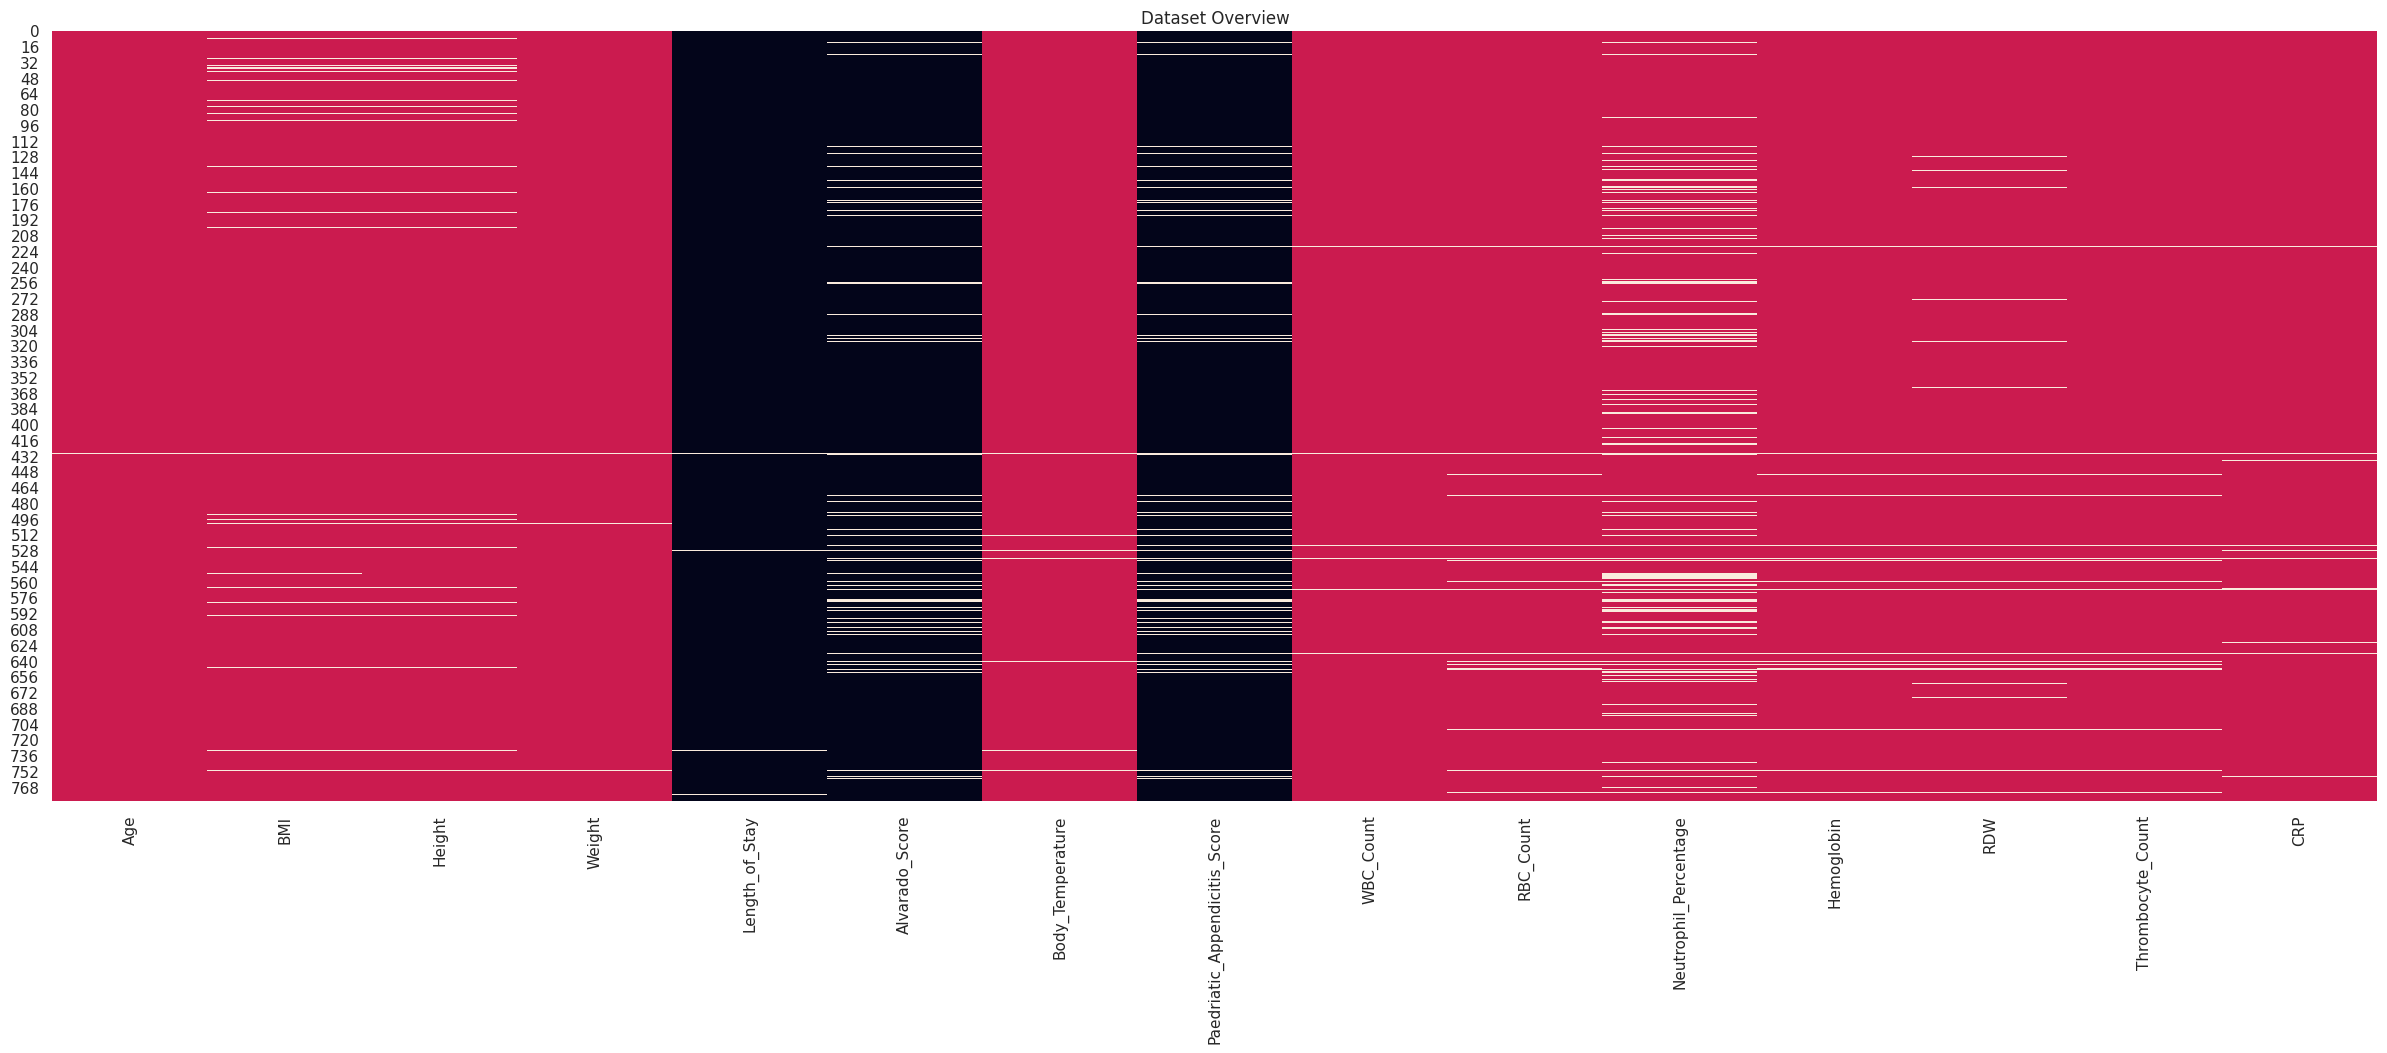

 Categerocial   Numeric   NaN 


In [307]:
dic_cols = {col:utils_recognize_type(df, col, max_cat=20) for col in df.columns}

heatmap = df.isnull()

for k,v in dic_cols.items():
    if v == "num":
        heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
    else:
        heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)

sns.heatmap(heatmap, cbar=False).set_title('Dataset Overview')

plt.show()
print("\033[1;37;40m Categerocial ", "\033[1;30;41m Numeric ", "\033[1;30;47m NaN ")

Text(0.5, 1.0, 'pearson correlation')

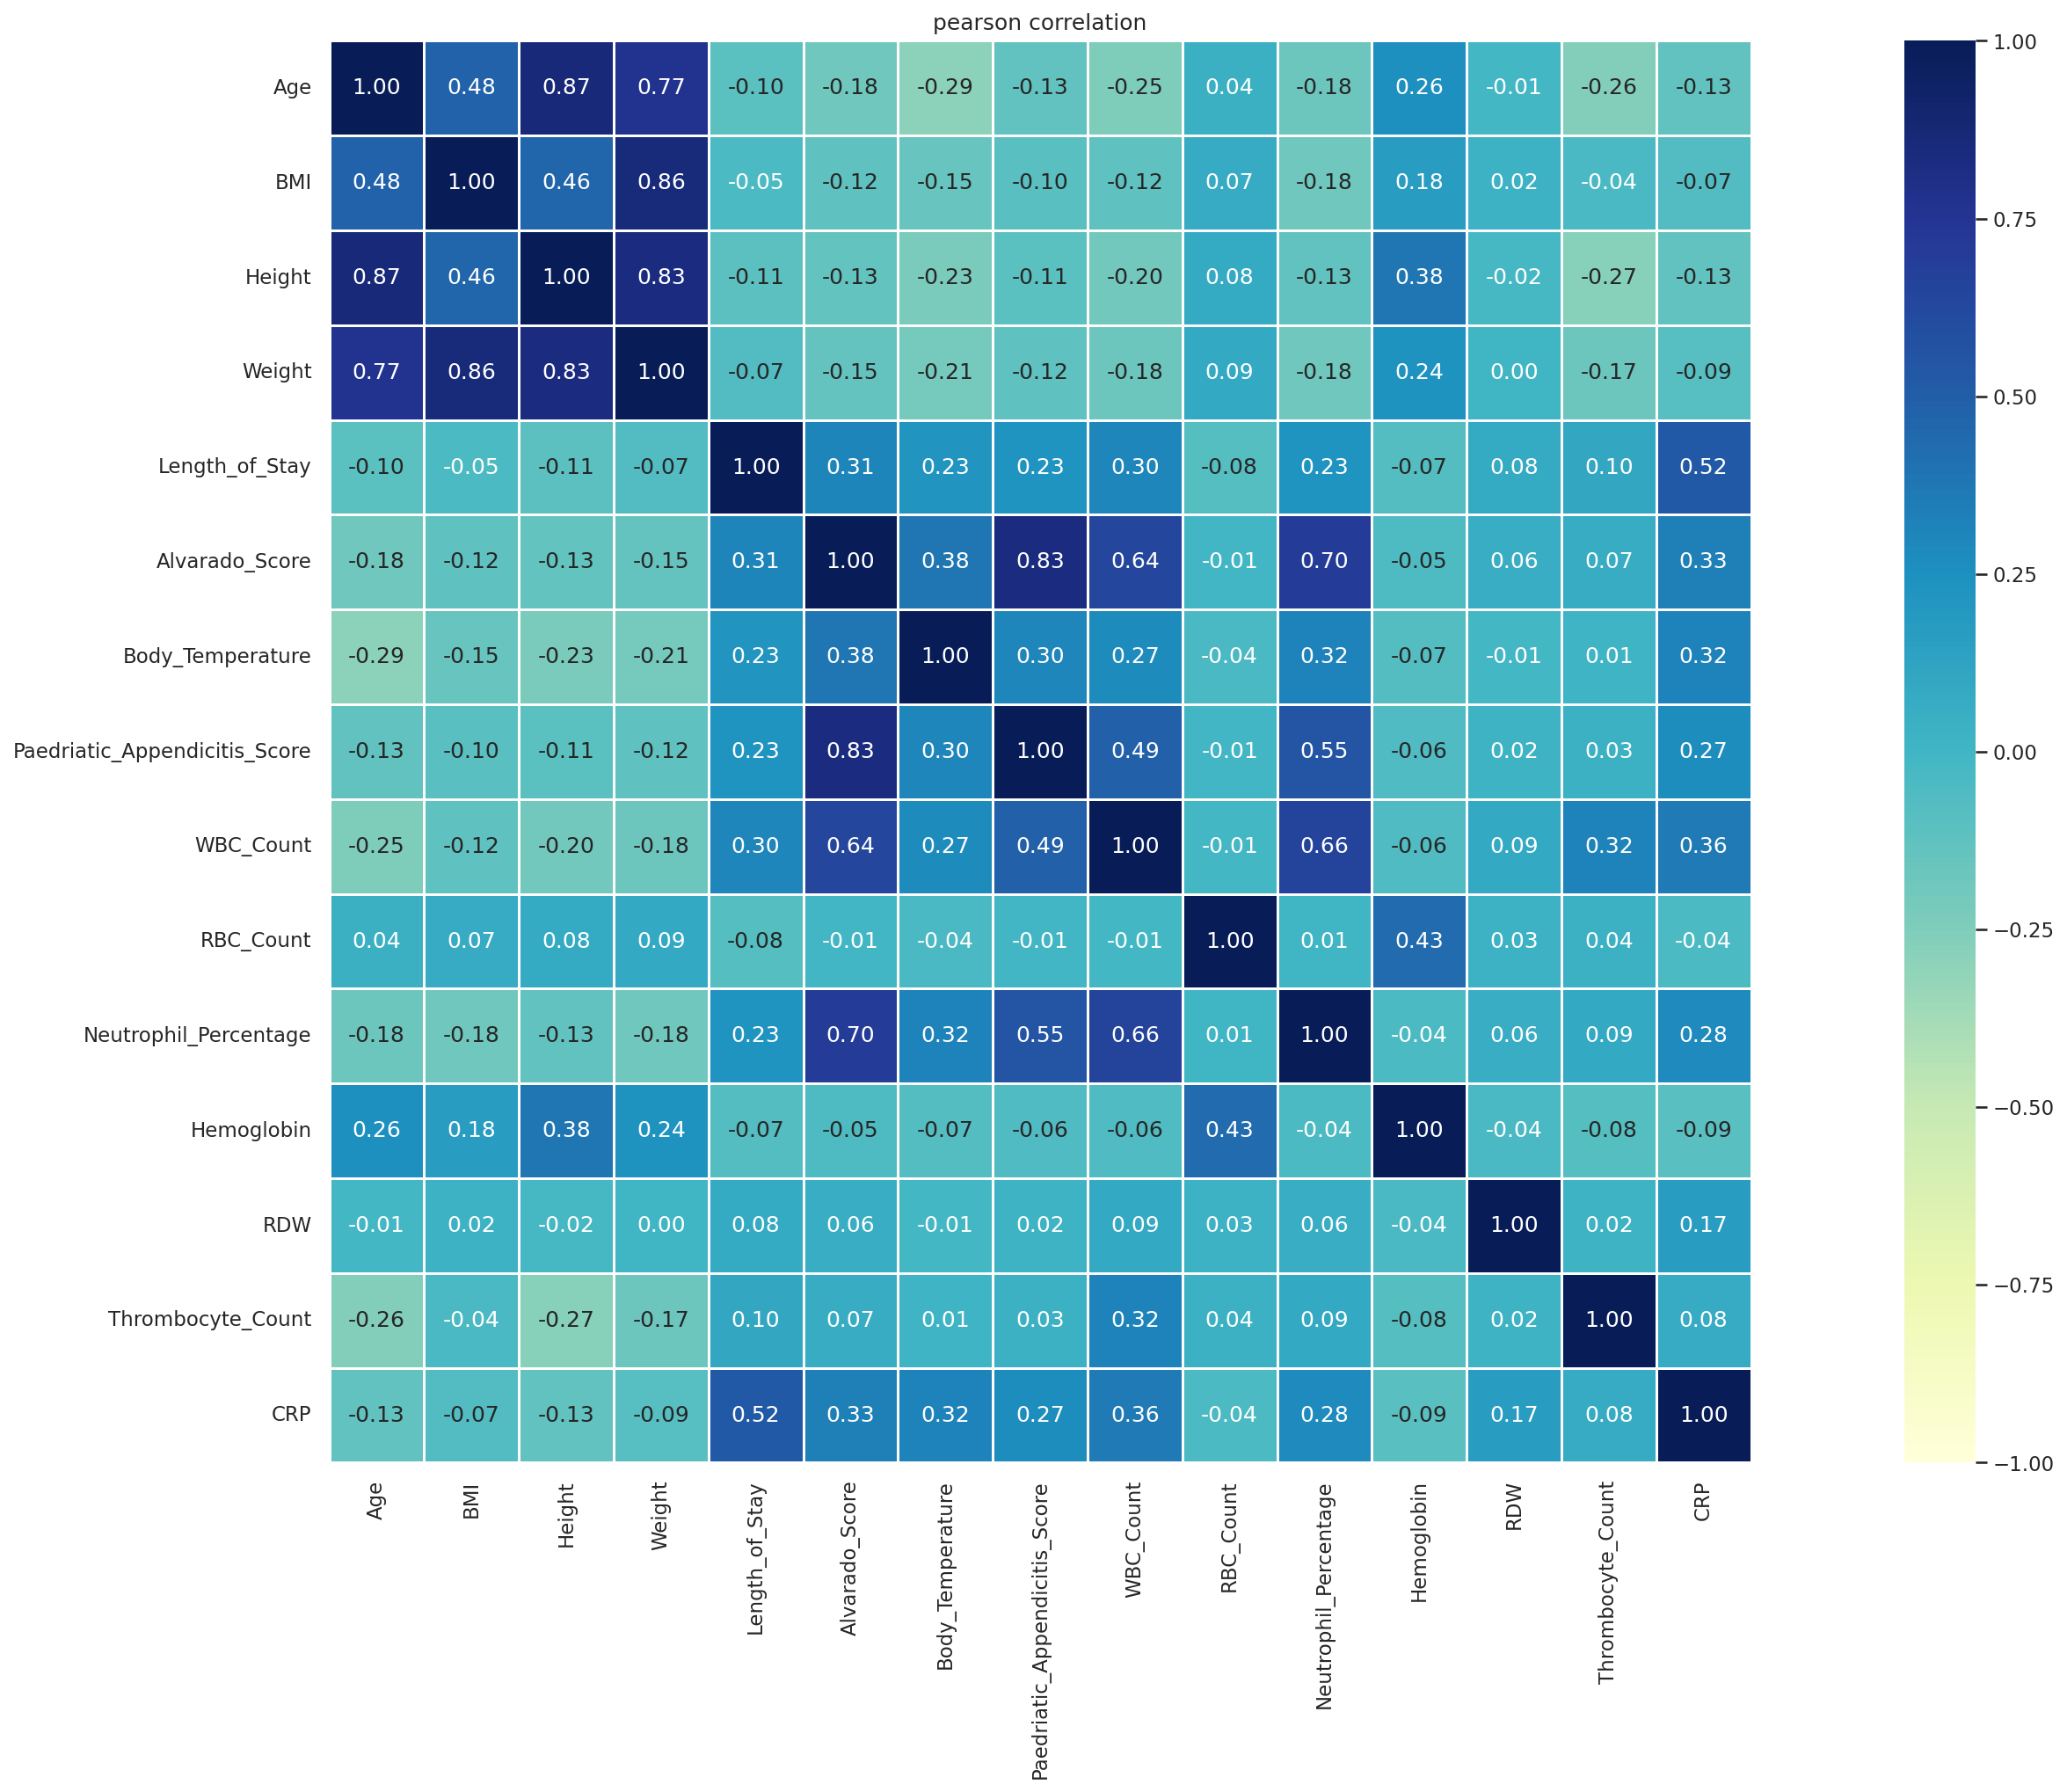

In [308]:
corr_matrix = df.copy()
plt.figure(figsize=(30,14),dpi=150)

for col in corr_matrix.columns:
  if corr_matrix[col].dtype == "O":
      corr_matrix[col] = corr_matrix[col].factorize(sort=True)[0]
corr_matrix = corr_matrix.corr(method="pearson",numeric_only = True)

sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5, square=True)
plt.title("pearson correlation")

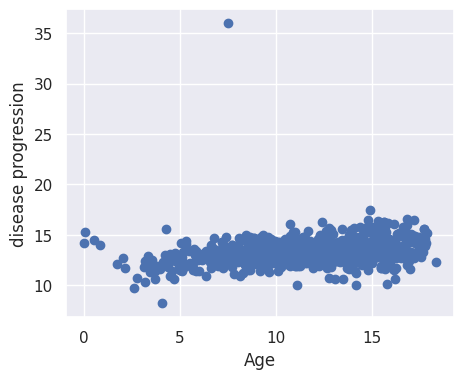

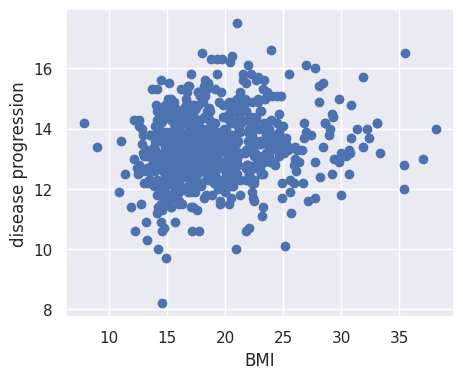

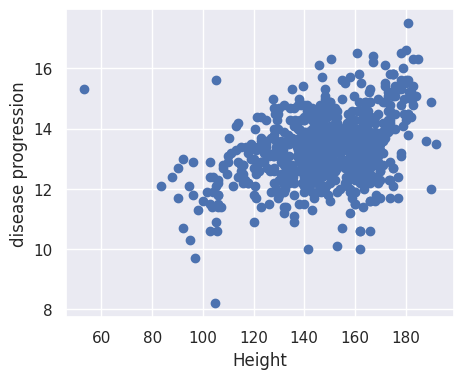

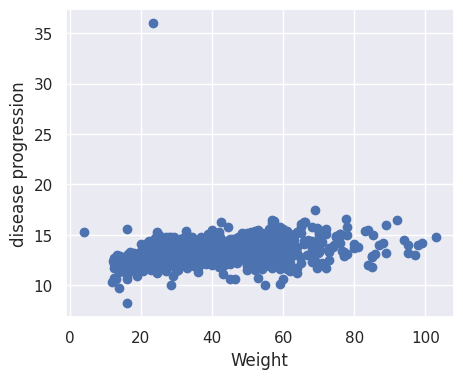

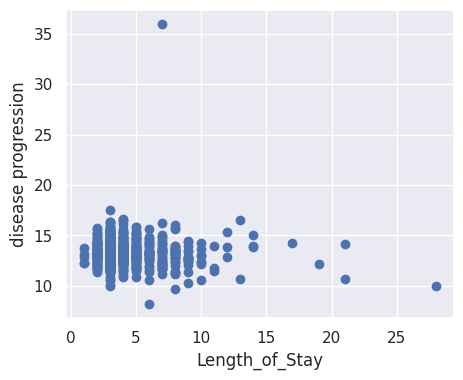

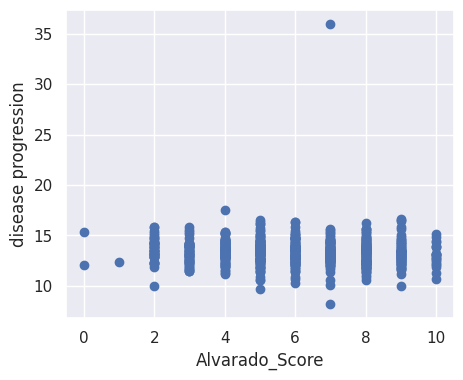

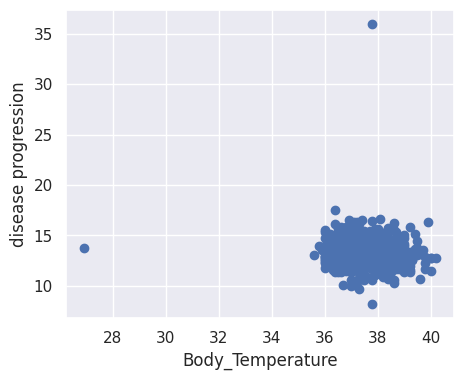

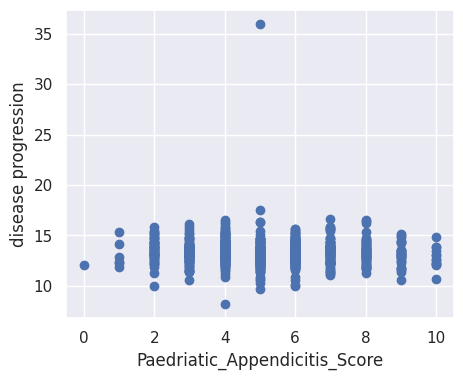

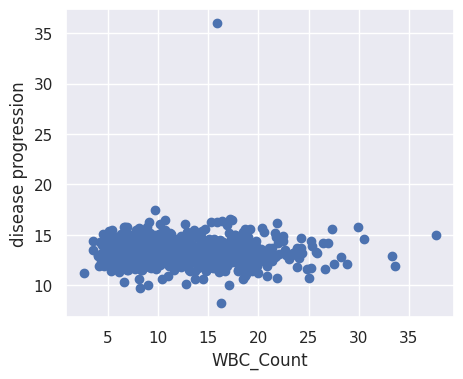

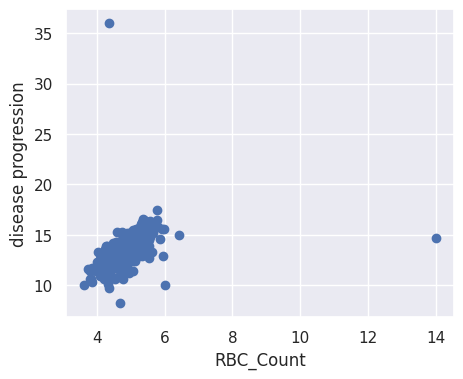

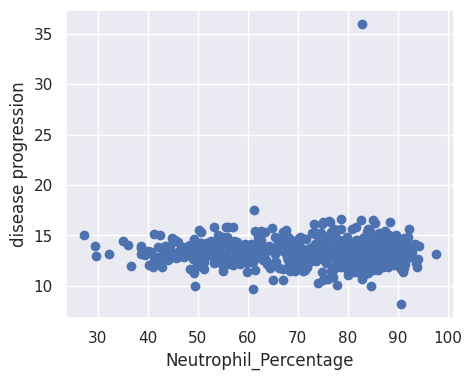

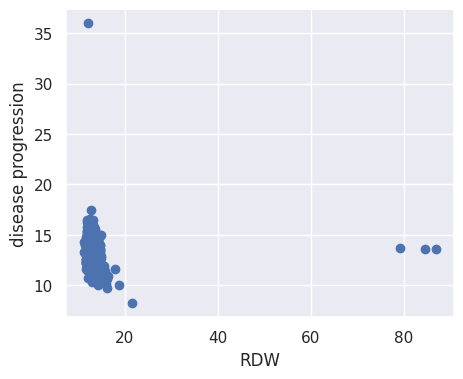

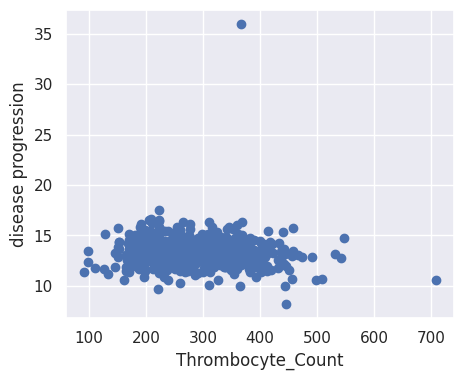

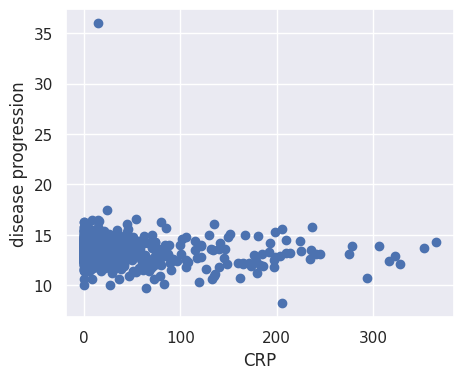

In [309]:
target = "Hemoglobin"
vizual_x = "Age"

for index, feature_name in enumerate(df.drop(target, axis=1).columns):
    plt.figure(figsize=(5, 4))
    plt.scatter(df[feature_name], df[target])
    plt.ylabel('disease progression', size=12)
    plt.xlabel(feature_name, size=12)
    plt.show()

In [310]:
df = df.dropna()

In [311]:
df=(df-df.min())/(df.max()-df.min())

In [312]:
df.head(5)

,Age,BMI,Height,Weight,Length_of_Stay,Alvarado_Score,Body_Temperature,Paedriatic_Appendicitis_Score,WBC_Count,RBC_Count,Neutrophil_Percentage,Hemoglobin,RDW,Thrombocyte_Count,CRP
0,0.709569,0.299044,0.594470,0.274725,0.074074,0.4,0.759398,0.3,0.122807,0.158960,0.581560,0.709677,0.013210,0.361419,0.000000
1,0.789032,0.793604,0.585253,0.631868,0.037037,0.5,0.751880,0.4,0.134503,0.157996,0.533333,0.806452,0.019815,0.133038,0.008219
2,0.791270,0.510056,0.732719,0.549451,0.111111,0.5,0.729323,0.3,0.283626,0.034682,0.675177,0.344086,0.013210,0.463415,0.008219
3,0.916060,0.421035,0.751152,0.483516,0.074074,0.7,0.684211,0.6,0.230994,0.098266,0.507801,0.580645,0.026420,0.370288,0.000000
4,0.620034,0.299044,0.732719,0.362637,0.074074,0.5,0.751880,0.6,0.134503,0.078998,0.238298,0.473118,0.031704,0.487805,0.000000


<Axes: >

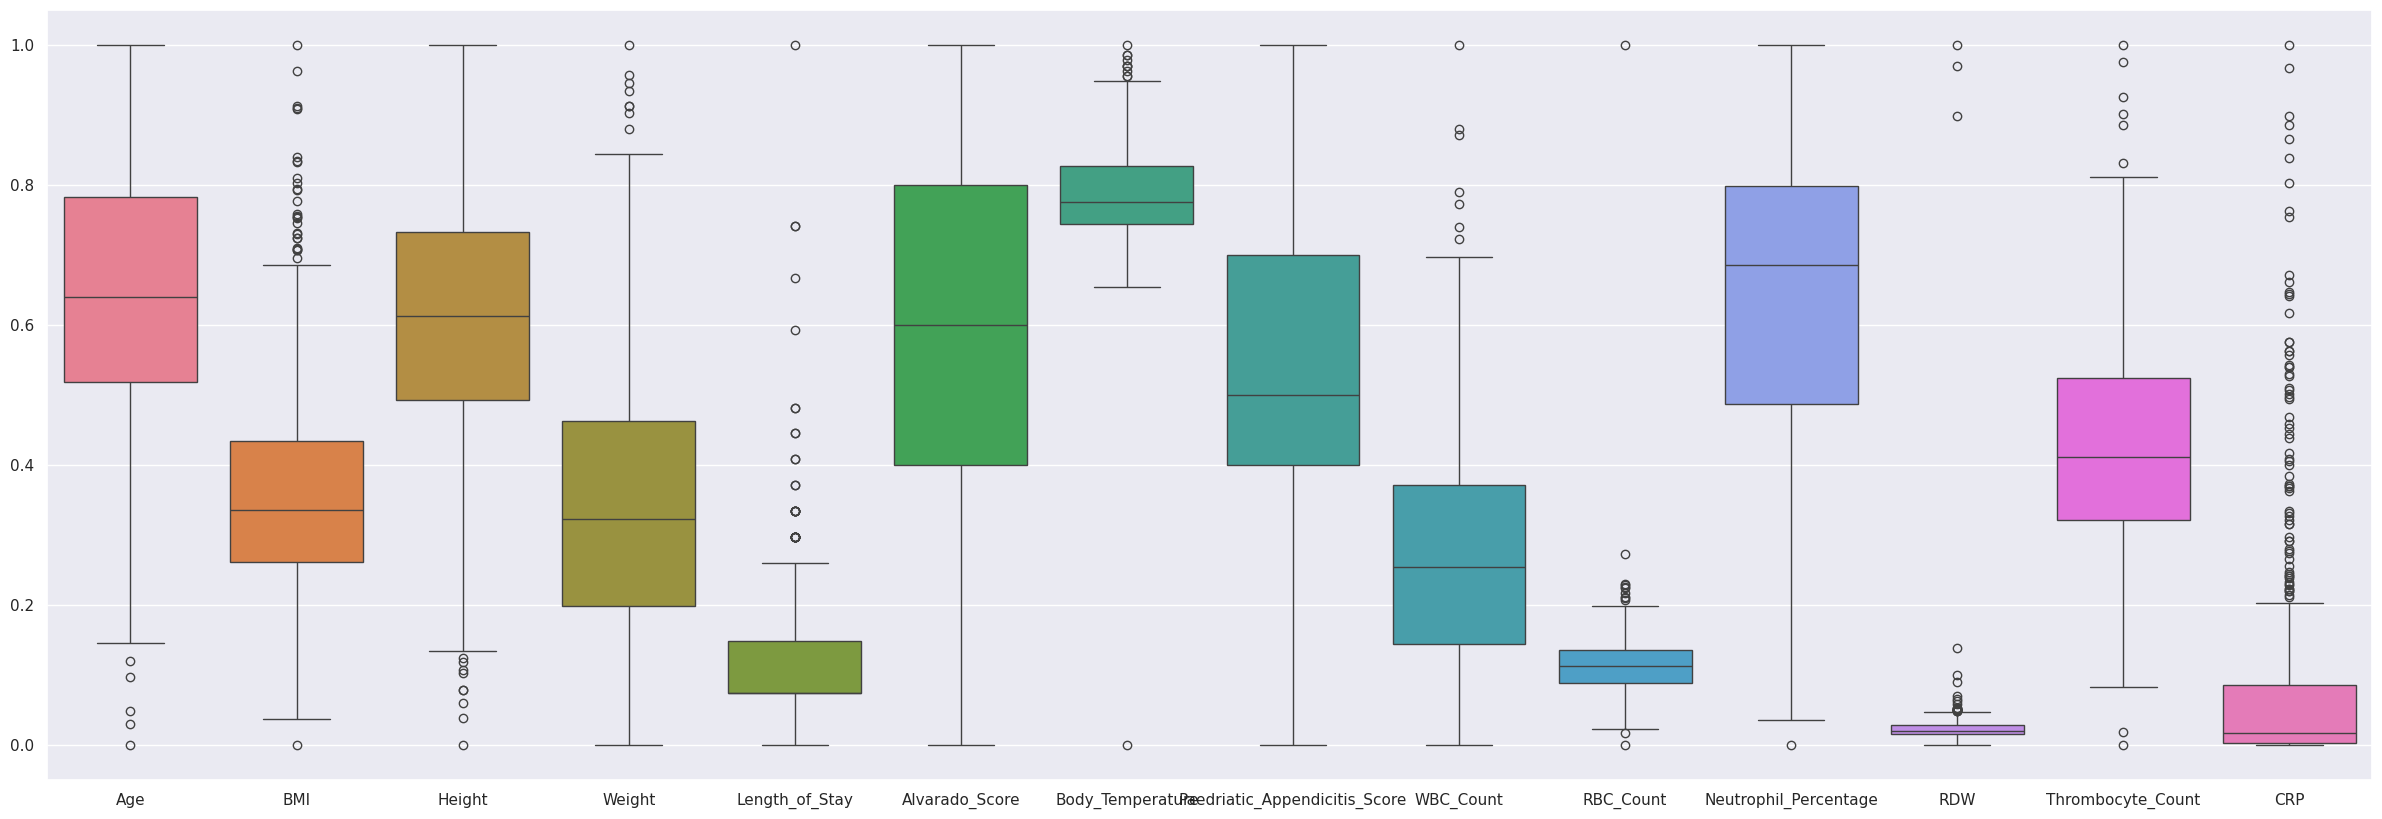

In [313]:
sns.set_theme(rc={'figure.figsize':(30,10)})
sns.boxplot(df.drop(["Hemoglobin"],axis=1))

<Axes: >

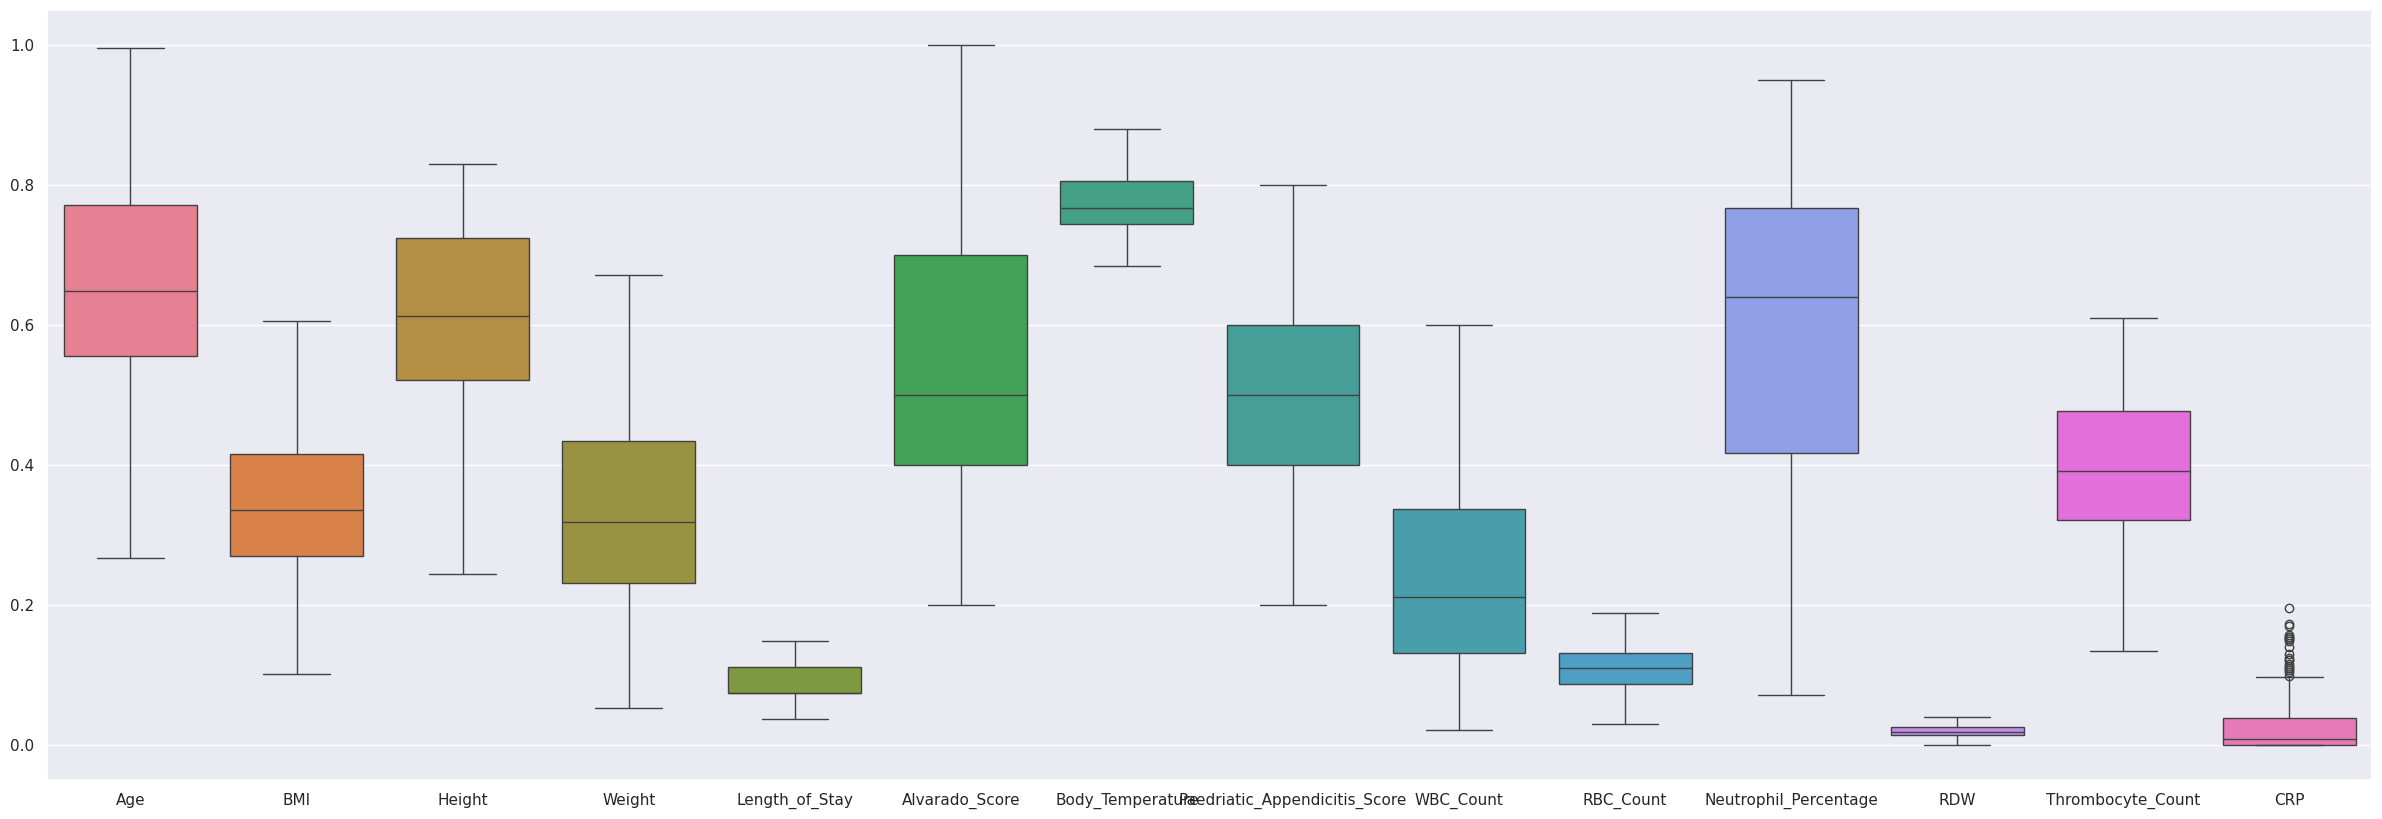

In [314]:
df = df[df["Age"] >= 0.22]
df = df[df["BMI"] >= 0.1]
df = df[df["BMI"] <= 0.62]
df = df[df["Height"] >= 0.21]
df = df[df["Height"] <= 0.83]
df = df[df["Length_of_Stay"] <= 0.18]
df = df[df["Length_of_Stay"] >= 0.01]
df = df[df["Body_Temperature"] >= 0.68]
df = df[df["Body_Temperature"] <= 0.88]
df = df[df["Paedriatic_Appendicitis_Score"] >= 0.2]
df = df[df["Paedriatic_Appendicitis_Score"] <= 0.8]
df = df[df["WBC_Count"] <= 0.6]
df = df[df["RBC_Count"] >= 0.02]
df = df[df["RBC_Count"] <= 0.19]
df = df[df["Neutrophil_Percentage"] >= 0.05]
df = df[df["RDW"] <= 0.04]
df = df[df["Thrombocyte_Count"] >= 0.1]
df = df[df["Thrombocyte_Count"] <= 0.61]
df = df[df["CRP"] <= 0.2]

sns.set_theme(rc={'figure.figsize':(30,10)})
sns.boxplot(df.drop(["Hemoglobin"],axis=1))

In [315]:
df_train, df_test = model_selection.train_test_split(df, test_size=0.2, random_state=47)

In [316]:
target = "Hemoglobin"

X_train = df_train.drop(target,axis=1)
y_train = df_train[target]

X_test = df_test.drop(target,axis=1)
y_test = df_test[target]

In [317]:
# сразу напишем код функции, которая будет вычислять все нужные метрики

def Reg_Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test,y_pred):
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

    # Calculating Adjusted R-squared
    r2 = model.score(X_test, y_test)
    # Number of observations is the shape along axis 0
    n = X_test.shape[0]
    # Number of features (predictors, p) is the shape along axis 1
    p = X_test.shape[1]
    # Adjusted R-squared formula
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()

    print(f'RMSE:  {round(RMSE,4)}\n  R2: {round(R2,4)}\n Adjusted R2: {round(adjusted_r2, 4)}\n Cross Validated R2: {round(cv_score.mean(),4)}')
    return R2, adjusted_r2, CV_R2, RMSE

In [318]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
modelLR = LinearRegression()

# Fit the model to the data
modelLR.fit(X_train, y_train)

# Predict the response for a new data point
y_pr_LR = modelLR.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(modelLR, X_train, y_train, X_test, y_test, y_pr_LR)

RMSE:  0.0579
  R2: 0.7315
 Adjusted R2: 0.6479
 Cross Validated R2: 0.5695


In [319]:
from sklearn.tree import DecisionTreeRegressor

# Create a stepwise regression model
modelDT = DecisionTreeRegressor()

# Fit the model to the data
modelDT.fit(X_train, y_train)

# Predict the response for a new data point
y_dt_pred = modelDT.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(modelDT, X_train, y_train, X_test, y_test, y_dt_pred)

RMSE:  0.0916
  R2: 0.3285
 Adjusted R2: 0.1196
 Cross Validated R2: -0.0317


In [320]:
from sklearn.ensemble import RandomForestRegressor

# Create a stepwise regression model
modelRF = RandomForestRegressor(n_estimators=100)

# Fit the model to the data
modelRF.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelRF.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(modelRF, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  0.0636
  R2: 0.6759
 Adjusted R2: 0.5751
 Cross Validated R2: 0.4457


In [321]:
from sklearn.svm import SVR

# Create a support vector regression model
modelSVR = SVR(kernel='linear')

modelSVR.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelSVR.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  0.0896
  R2: 0.3575
 Adjusted R2: 0.1576
 Cross Validated R2: 0.2514


In [322]:
from sklearn.svm import SVR

# Create a support vector regression model. Полиномиальное ядро
modelSVR = SVR(kernel='poly')

modelSVR.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelSVR.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  0.0795
  R2: 0.4937
 Adjusted R2: 0.3362
 Cross Validated R2: 0.2899


In [323]:
# Create a support vector regression model. Ядро - радиальная базисная функция
modelSVR = SVR(kernel='rbf')

modelSVR.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelSVR.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  0.0905
  R2: 0.3446
 Adjusted R2: 0.1407
 Cross Validated R2: 0.2189


In [324]:
from sklearn.linear_model import ElasticNet

# Create an elastic net regression model
modelEN = ElasticNet(alpha=0.1, l1_ratio=0.8)

# Fit the model to the data
modelEN.fit(X_train, y_train)

# Predict the response for a new data point
y_en_pred = modelEN.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(modelEN, X_train, y_train, X_test, y_test, y_en_pred)

RMSE:  0.1125
  R2: -0.0134
 Adjusted R2: -0.3287
 Cross Validated R2: -0.0837


In [325]:
def Viz_Plot(model):
  plt.scatter(X_train[vizual_x], y_train, color='darkorange',
            label='data')
  plt.plot(X_train[vizual_x], model.predict(X_train), color='cornflowerblue',
          label='prediction')
  plt.legend()
  plt.show()

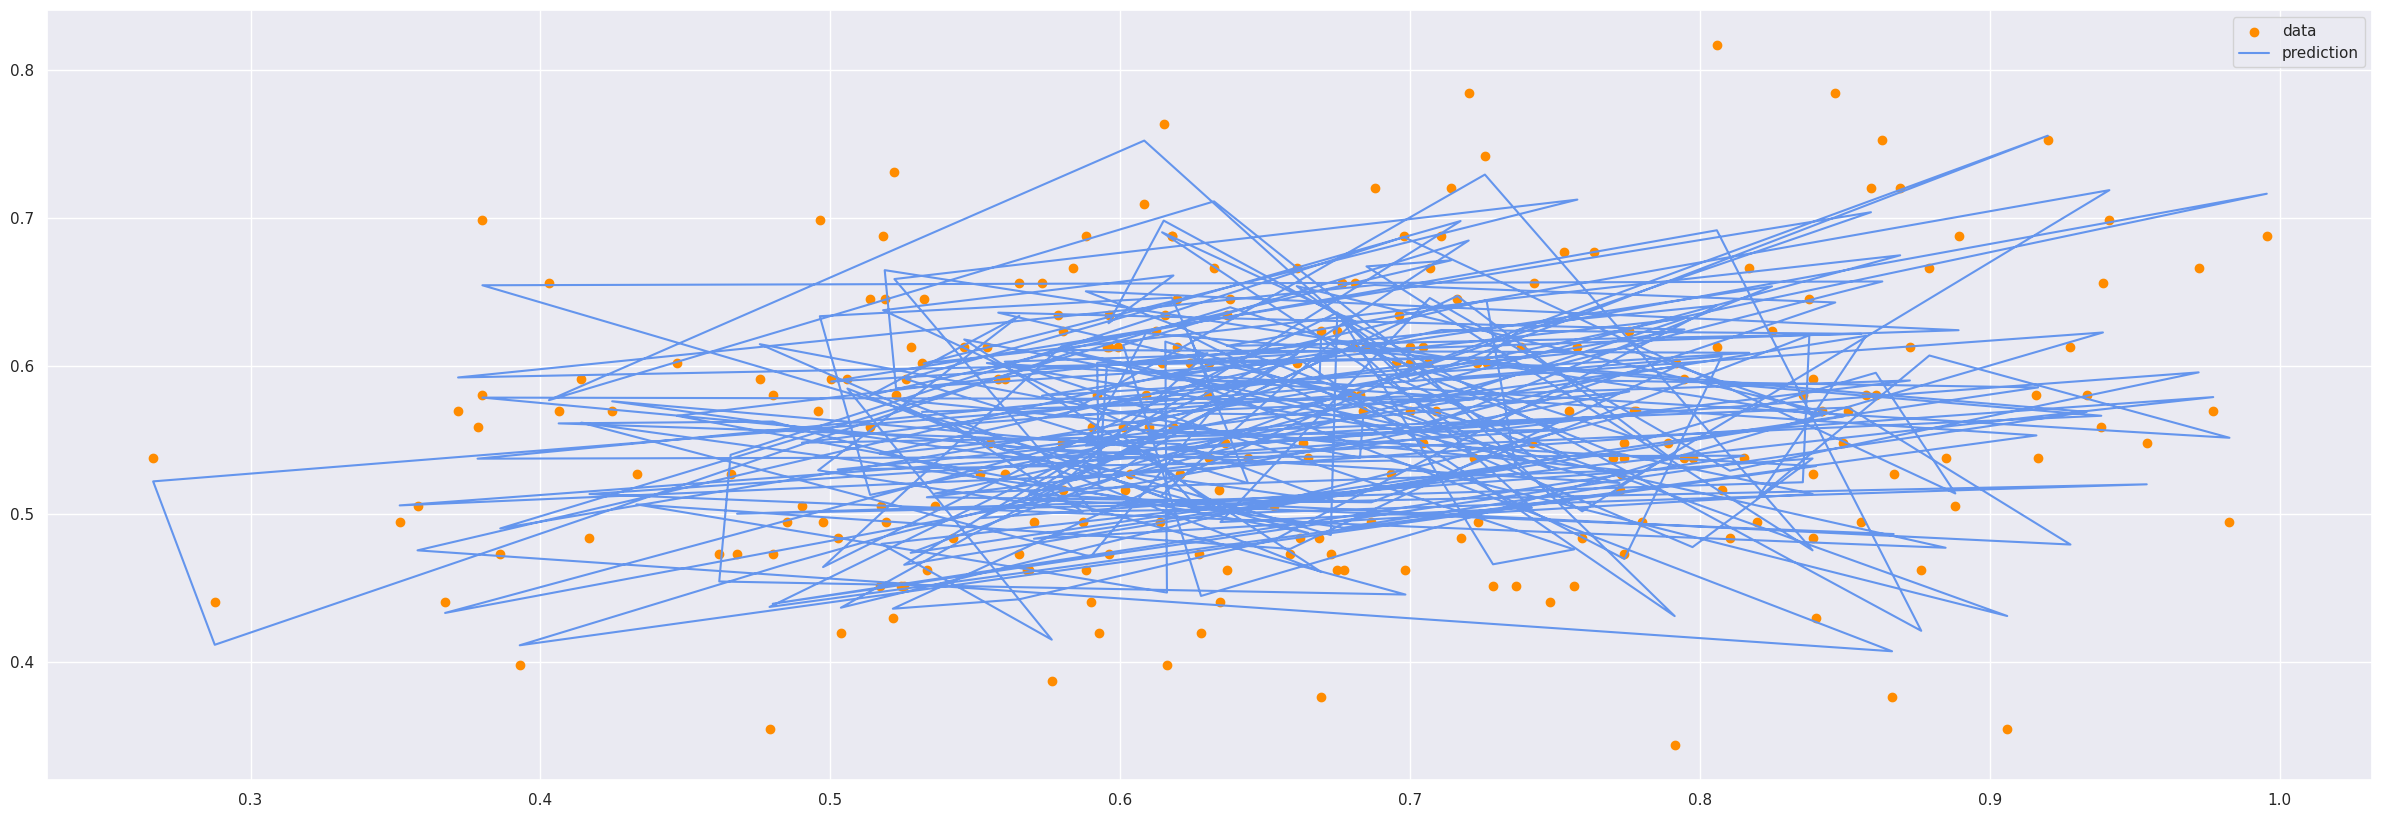

In [326]:
Viz_Plot(modelLR)